In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.inspection import plot_partial_dependence
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [121]:
file_path = 'C:/Users/huang/Desktop/Files/Immigration/Job Search/DS Portfolio/Tableau/spotify_top_songs_audio_features.csv'
df = pd.read_csv(file_path)
df = pd.DataFrame(df)
#print(df)

In [122]:
#Extract the metadata of each column's variable types
data_types = df.dtypes
print(data_types)

id                   object
artist_names         object
track_name           object
source               object
key                  object
mode                 object
time_signature       object
danceability        float64
energy              float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
loudness            float64
tempo               float64
duration_ms           int64
weeks_on_chart        int64
streams               int64
dtype: object


In [123]:
#print(df.columns)

In [124]:
#Determine
artist_name_comma_count = df['artist_names'].str.count(',')
max_comma_count = artist_name_comma_count.max()
print("The maximal number of artists of a single entry is :", (max_comma_count+1))

The maximal number of artists of a single entry is : 11


In [125]:
#Separate the artist_names into the corresponding number of max count of artists ina single statistics entries
new_columns = []
new_columns = df['artist_names'].str.split(',', expand=True)
new_columns.columns = ['artist'+str(i+1) for i in range (max_comma_count+1)]

#Set the new_columns into dataframe
new_columns = pd.DataFrame(new_columns)
print(new_columns)
#print(df)

             artist1             artist2       artist3 artist4 artist5  \
0               ZAYN       PARTYNEXTDOOR          None    None    None   
1       Alessia Cara                None          None    None    None   
2        The Killers                None          None    None    None   
3            Cardi B   Chance the Rapper          None    None    None   
4        Post Malone          The Weeknd          None    None    None   
...              ...                 ...           ...     ...     ...   
6508    Taylor Swift                None          None    None    None   
6509      Young Thug          A$AP Rocky   Post Malone    None    None   
6510          Eminem         Jack Harlow        Cordae    None    None   
6511  Kendrick Lamar         Tanna Leone          None    None    None   
6512             NAV          The Weeknd          None    None    None   

     artist6 artist7 artist8 artist9 artist10 artist11  
0       None    None    None    None     None     None

In [126]:
#Check if artist_name 1-11 columns have any all-null columns
is_column_null = new_columns.isnull().all()
print(is_column_null)

artist1     False
artist2     False
artist3     False
artist4     False
artist5     False
artist6     False
artist7     False
artist8     False
artist9     False
artist10    False
artist11    False
dtype: bool


In [127]:
#Create an artist roster by stacking non-null columns of the new_columns matrix. The result will contains duplicates
artist_roster = []
artist_roster = new_columns.stack().dropna().tolist()

#artist_count_dup = len(artist_roster)
#print("Artist counts with duplicates:",artist_count_dup)

#Dropping duplicates and artist roster length report 
artist_roster = list(set(artist_roster))
artist_count_non_dup = len(artist_roster)
print("Artist counts without duplicates:",artist_count_non_dup)

#50 samples of the non-duplicate artist roster
print("50 non-duplicate artist roster sample:",artist_roster[:50])

Artist counts without duplicates: 2552
50 non-duplicate artist roster sample: [' Villano Antillano', 'Oxlade', ' Jesse®', 'a-ha', 'Band Aid', ' Nonna', 'A$AP Rocky', 'Noah Kahan', ' Dani Flow', 'Topic', 'Nicky Youre', ' shy martin', ' Ink', 'Arctic Monkeys', ' Smokepurpp', ' Mez', 'Luar La L', ' DrefGold', ' RM', ' Marracash', 'BoyWithUke', 'John Mayer', 'Tyga', 'Metallica', ' KayBlack', ' Bright Sparks', ' Frank Ocean', ' Kellin Quinn', ' Chencho Corleone', ' Blake Shelton', ' Kris Kross Amsterdam', 'Mae Stephens', 'Veigh', ' Romy', 'Rosa Linn', 'Chase Atlantic', 'Ritt Momney', 'Kali Uchis', ' Bonn', ' Phoebe Ryan', ' Camila Cabello', ' Wisin', 'Farruko', 'Dean Martin', 'Baby Tate', 'Starley', ' Jay Electronica', 'Saweetie', 'Piso 21', 'Skrillex']


In [128]:
#Creating a dataframe out of unique artist roster and add features to it.
reg_df = pd.DataFrame(artist_roster,columns = ['artist_roster'])

#Sorting artist roster with alphabetical order
reg_df = reg_df.sort_values(by = 'artist_roster')

#Create and assign unique artist id
uid = range(1, artist_count_non_dup+1)
reg_df['uid'] = uid
reg_columns = ['uid','artist_roster']
reg_df = reg_df[reg_columns]
print(reg_df)

       uid artist_roster
1200     1          $NOT
1835     2      (G)I-DLE
1224     3     070 Shake
273      4   13 Organisé
2223     5      2 Chainz
...    ...           ...
217   2548        thasup
1660  2549     twocolors
1849  2550        zzoilo
1667  2551            ¥$
208   2552    Ñengo Flow

[2552 rows x 2 columns]


In [130]:
#Establish a list "float_column_names" for columns names if their data types are "float64" or "int64"
float_column_names = []

for column in df.columns:
    if df[column].dtypes == 'float64' or df[column].dtypes =='int64':
        float_column_names.append(column)
print(float_column_names)
    

['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'loudness', 'tempo', 'duration_ms', 'weeks_on_chart', 'streams']


In [134]:
#Establish a full dataframe for regression
for column in float_column_names:
    reg_df[column] = pd.NA
print(reg_df)


       uid artist_roster danceability energy speechiness acousticness  \
1200     1          $NOT          NaN    NaN         NaN          NaN   
1835     2      (G)I-DLE          NaN    NaN         NaN          NaN   
1224     3     070 Shake          NaN    NaN         NaN          NaN   
273      4   13 Organisé          NaN    NaN         NaN          NaN   
2223     5      2 Chainz          NaN    NaN         NaN          NaN   
...    ...           ...          ...    ...         ...          ...   
217   2548        thasup          NaN    NaN         NaN          NaN   
1660  2549     twocolors          NaN    NaN         NaN          NaN   
1849  2550        zzoilo          NaN    NaN         NaN          NaN   
1667  2551            ¥$          NaN    NaN         NaN          NaN   
208   2552    Ñengo Flow          NaN    NaN         NaN          NaN   

     instrumentalness liveness valence loudness tempo duration_ms  \
1200              NaN      NaN     NaN      NaN   NaN 

<function matplotlib.pyplot.show(close=None, block=None)>

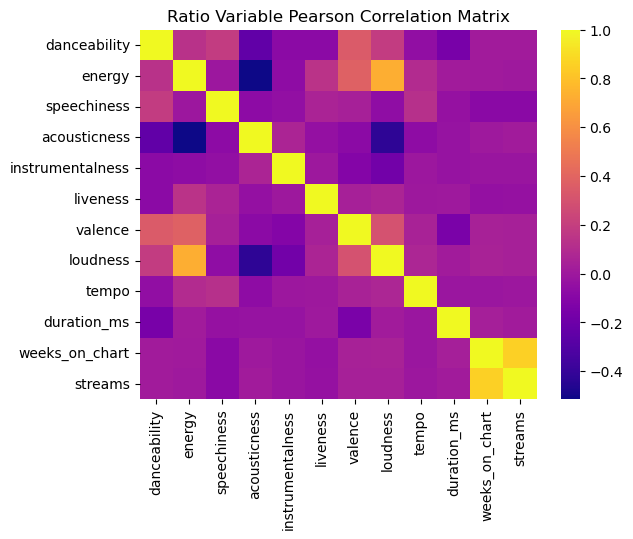

In [118]:
corr_df = df[float_column_names]
corr_matrix = corr_df.corr()
sns.heatmap(corr_matrix,cmap = 'plasma')
plt.title('Ratio Variable Pearson Correlation Matrix')
plt.show
#print(corr_matrix)

In [71]:
# Scitkit-Learn for Regression
# Dependent variable
dependent = ['streams']
y = df[dependent]
# Independent variables, excluding 'streams' as a self-explanatory factor
independent = [column for column in float_column_names if column not in y.columns]
X = df[independent]
#X = X.drop('weeks_on_chart', axis = 1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

print("Predictions:", predictions)

In [72]:
# Cutting dataframe for traning and testing of GB Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

chart_popularity_reg_numerical= GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=0)
chart_popularity_reg_numerical.fit(X_train, y_train)


C:\Users\huang\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=1.0, random_state=0)

In [73]:
# Making predictions
predictions = chart_popularity_reg_numerical.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 298.9170889719124
R-squared: 0.5078260513651283


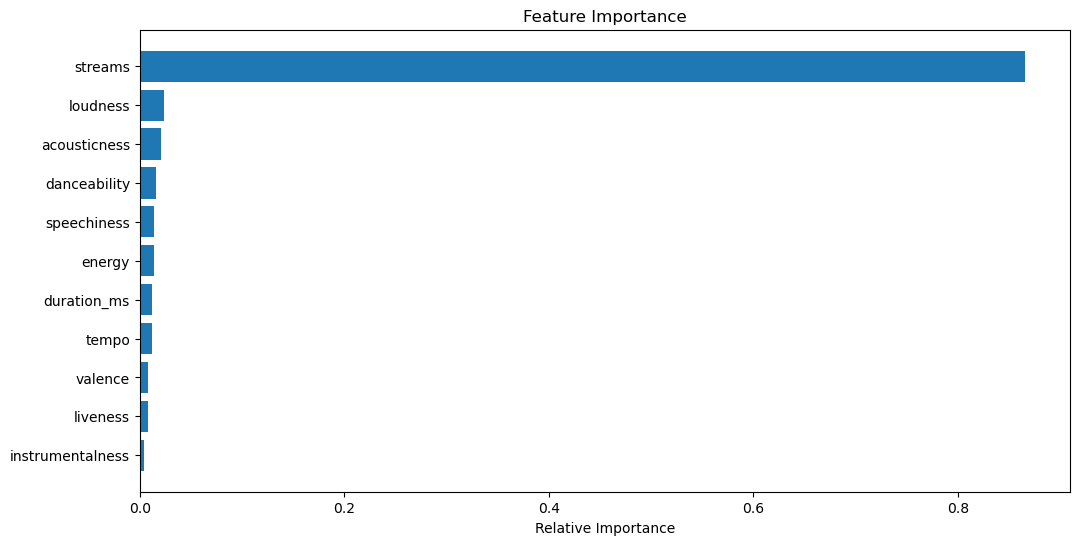

In [74]:
#Feature Importance 
feature_importance = chart_popularity_reg_numerical.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()

In [43]:
# Encoding categorical variables
onehot_encoder = OneHotEncoder(sparse_output=True)  # sparse_output is not a valid parameter; use sparse=False

artist_name_matrix

print(df.columns)



Index(['id', 'source', 'key', 'mode', 'time_signature', 'danceability',
       'energy', 'speechiness', 'acousticness', 'instrumentalness',
       ...
       'track_name_yes, and?', 'track_name_you broke me first',
       'track_name_you should see me in a crown', 'track_name_Échame La Culpa',
       'track_name_Índigo', 'track_name_İmdat',
       'track_name_‘tis the damn season', 'track_name_’98 Braves',
       'track_name_∞ LOVE (feat. Guè)', 'track_name_アイドル'],
      dtype='object', length=8369)
